<a href="https://colab.research.google.com/github/BeeBooBap/AMLCW/blob/main/AML_DW_D6_testingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

root = '/content/drive/MyDrive/AML Data/'
filename1 = root + 'cw-train-data.csv'
filename2 = root + 'cw-test-data.csv'

# imports
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from numpy import set_printoptions
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
print(tf.__version__)
from __future__ import print_function
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns

Mounted at /content/drive
2.7.0


(97044, 153)


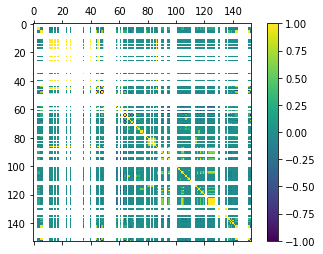

In [ ]:
# Correlation Matrix - Training Data
raw_data = read_csv(filename1)
print(raw_data.shape)
correlations = raw_data.corr()

# plot correlation matrix - Training Data
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

(40158, 153)


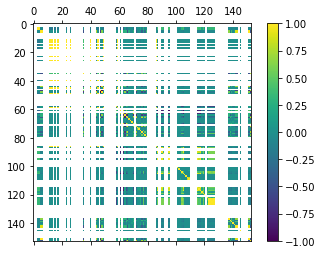

In [ ]:
# Correlation Matrix - Test Data
test_data = read_csv(filename2)
print(test_data.shape)
correlations = test_data.corr()

# plot correlation matrix - Test Data
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

In [ ]:
# TRAINING SAE MODEL

# separate array into input and output components
X = raw_data.iloc[:, 0:152].values
Y = raw_data.iloc[:, -1].values
# normalise data using scikit-learn Normalizer class
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:1,:])

# use of PCA in dimensionality reduction prior to AE
pca = PCA(n_components=50)
fit = pca.fit_transform(normalizedX)
print(fit)
reduced_X = fit

# generating a regularized autoencoder model
input = Input(shape=(50,))

encoded = Dense(32, activation='relu')(input)
encoded = Dense(16, activation='relu', activity_regularizer = l1(10e-6))(encoded)

decoded = Dense(32, activation='relu')(encoded)
output = Dense(50, activation='sigmoid')(decoded)

# first AE
autoencoder_1 = Model(input, output)
autoencoder_1.compile(optimizer='adam', loss='mse')
autoencoder_1.summary()

# first stack
stack_1 = autoencoder_1.fit(reduced_X, reduced_X, epochs=10, batch_size=25, validation_split=0.33)

# second AE
autoencoder_2_input = autoencoder_1.predict(reduced_X)
autoencoder_2_input = np.concatenate((autoencoder_2_input, reduced_X))
autoencoder_2 = Model(input, output)
autoencoder_2.compile(optimizer='adam', loss='mse')
autoencoder_2.summary()

# second stack
stack_2 = autoencoder_2.fit(autoencoder_2_input, autoencoder_2_input, epochs=5, batch_size=25, validation_split=0.33)

[[0.000e+00 0.000e+00 0.000e+00 1.450e-05 1.450e-05 2.019e-03 2.019e-03
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.206e-01 2.206e-01 2.206e-01
  2.206e-01 2.206e-01 0.000e+00 2.206e-01 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 2.206e-01 0.000e+00 0.000e+00 2.206e-01 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.134e-02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.206e-01 0.000e+00
  0.000e+00 0.000e+00 1.957e-01 2.165e-01 0.000e+00 0.000e+00 2.206e-01
  2.206e-01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 1.554e-01 2.206e-01 0.000e+00 1.805e-01 0.000e+00
  2.206e-01 6.789e-02 1.103e-01 0.000e+00 0.000e+00 2.206e-01 0.000e+00
  0.000e+00 0.000e+00 6.695e-04 2.486e-04 2.596e-03 3.183e-04 3.178e-04
  3.253e-04 0.000e+00 2.088e-01 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 2.206e-01 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.

In [ ]:
# TEST DATA PRE PROCESSING

# separate array into input and output components
test_X = test_data.iloc[:, 0:152].values
test_Y = test_data.iloc[:, -1].values
# normalise data using scikit-learn Normalizer class
test_scaler = Normalizer().fit(test_X)
test_normalizedX = test_scaler.transform(test_X)

# use of PCA in dimensionality reduction prior to AE
test_fit = pca.fit_transform(test_normalizedX)
test_reduced_X = test_fit

In [ ]:
# FEATURE GENERATION 

# generating new features using SAE trained model
additional_features = autoencoder_2.predict(test_reduced_X)

# combining selected features with original features
selected_features = pd.DataFrame(data=additional_features)

print(additional_features.shape)
print(test_data.shape)

final_data = pd.concat([selected_features.reset_index(drop=True), test_data.reset_index(drop=True)], axis=1)

# new data variable containing 50 additional features as selected using PCA
peek = final_data.head(20)
print(final_data.shape)
print(peek)

X = final_data.iloc[:,:202].values
y = final_data.iloc[:, -1].values

(40158, 50)
(40158, 153)
(40158, 203)
           0             1         2             3  ...  152  153      154  155
0   0.000002  5.144776e-07  0.000051  1.009345e-03  ...    0    0  0.98674    0
1   0.000010  1.764478e-06  0.000101  2.558053e-03  ...    0    0  0.98674    0
2   0.000004  3.512386e-07  0.000057  1.091093e-03  ...    0    0  0.98674    0
3   0.251329  1.776278e-01  0.000110  1.245311e-02  ...    0    0  0.00000    0
4   0.000004  2.954928e-07  0.000011  2.019447e-05  ...    0    0  0.98674    0
5   0.000005  9.138233e-08  0.000044  5.504787e-04  ...    0    0  0.98674    0
6   0.000033  1.971085e-07  0.000058  1.154155e-03  ...    0    0  0.98674    0
7   0.114667  1.800120e-03  0.000858  2.058231e-07  ...    0    0  0.05305    0
8   0.253615  1.747711e-01  0.000118  1.345697e-02  ...    0    0  0.00000    0
9   0.254465  1.737968e-01  0.000122  1.397187e-02  ...    0    0  0.00000    0
10  0.000001  1.182162e-06  0.000014  9.189695e-05  ...    0    0  0.98674    0
11

In [ ]:
# MI FILTER
mi_score = MIC(X,y)
print(mi_score)

# calculate MI scores with 3 instances of the same dataset 
X_train_1, X_test_1, y_train, y_test = train_test_split(X, y, random_state=7)

mi_score_selected_index = np.where(mi_score <= 0)[0]
X_2 = X[:,mi_score_selected_index]
X_train_2,X_test_2,y_train,y_test = train_test_split(X_2, y, random_state=7, stratify=y)

mi_score_selected_index = np.where(mi_score > 0)[0]
X_3 = X[:,mi_score_selected_index]
X_train_3,X_test_3,y_train,y_test = train_test_split(X_3, y, random_state=7, stratify=y)

# comparing scores to determine which dataset is the most accurate
from sklearn.tree import DecisionTreeClassifier as DTC
model_1 = DTC().fit(X_train_1,y_train)
model_2 = DTC().fit(X_train_2,y_train)
model_3 = DTC().fit(X_train_3,y_train)
score_1 = model_1.score(X_test_1,y_test)
score_2 = model_2.score(X_test_2,y_test)
score_3 = model_3.score(X_test_3,y_test)
print(f"score_1:{score_1}\nscore_2:{score_2}\nscore_3:{score_3}")

# Determine how many features used
print("score_1:", X_train_1.shape)
print("score_2:", X_train_2.shape) 
print("score_3:", X_train_3.shape)

[6.401e-01 4.559e-01 6.118e-01 3.090e-01 5.555e-01 5.008e-01 2.350e-01
 2.533e-01 3.458e-01 4.108e-01 3.589e-01 3.044e-01 2.707e-01 5.831e-01
 3.399e-01 3.211e-01 4.009e-01 3.194e-01 4.195e-01 3.547e-01 3.784e-01
 1.724e-01 3.096e-01 2.280e-01 2.628e-01 3.910e-01 3.643e-01 3.041e-01
 2.707e-01 2.832e-01 3.101e-01 2.652e-01 3.310e-01 3.353e-01 3.441e-01
 3.604e-01 3.074e-01 3.201e-01 3.122e-01 3.050e-01 3.110e-01 3.444e-01
 2.919e-01 3.070e-01 2.908e-01 2.916e-01 3.182e-01 2.765e-01 3.278e-01
 3.144e-01 0.000e+00 1.397e-03 1.080e-03 3.287e-01 3.294e-01 6.894e-01
 6.893e-01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.076e-03 6.976e-03
 5.256e-03 5.354e-03 6.951e-03 4.721e-03 3.312e-03 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 5.749e-03 2.960e-03 2.420e-03 5.490e-03 4.467e-03
 4.334e-03 0.000e+00 3.244e-03 7.854e-04 0.000e+00 2.482e-03 7.049e-04
 3.185e-03 6.412e-01 0.000e+00 0.000e+00 0.000e+00 1.144e-03 6.832e-03
 2.084e-03 7.075e-04 3.912e-03 3.925e-01 5.773e-03 0.000e+00 3.565e-01
 3.567

In [ ]:
# FEATURE SELECTION using RFE with LogRes model
X, y = X_train_3, y_train

model = LogisticRegression(solver='liblinear')
rfe = RFE(estimator=model, n_features_to_select=20)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

features = fit.transform(X)
print(features.shape)

# load reduced feature dataset
X, y = features, y

Num Features: 20
Selected Features: [False  True False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False  True False False False False False
 False  True  True False False False  True False False  True False False
  True False False False False False False  True False  True False False
 False False False  True  True False False  True False False False False
 False False False  True False False  True False False False  True False
 False False False False False False False False False False False False
 False False Fa

LR: 0.998074 (0.000810)
LDA: 0.996813 (0.000918)
KNN: 0.999303 (0.000377)
CART: 0.999900 (0.000213)
NB: 0.989475 (0.001260)
SVM: 0.998141 (0.000829)


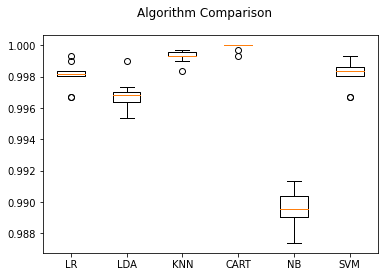

In [ ]:
# Compare ML Classification Algorithms - accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
 kfold = KFold(n_splits=10, random_state=7,shuffle=True)
 cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)
 
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: -0.007515 (0.001425)
KNN: -0.010029 (0.011196)
SVM: nan (nan)


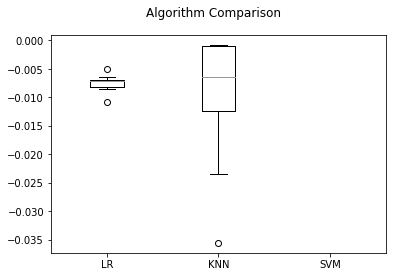

In [ ]:
# Cross Validation Classification - LogLoss

# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'neg_log_loss'
for name, model in models:
 kfold = KFold(n_splits=10, random_state=7,shuffle=True)
 cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)
 
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: 0.999974 (0.000030)
LDA: 0.999976 (0.000024)
KNN: 0.999801 (0.000265)
CART: 0.999866 (0.000221)
NB: 0.998850 (0.000537)
SVM: 0.999927 (0.000203)


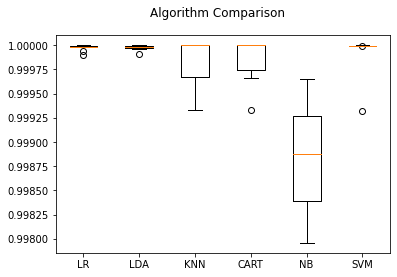

In [ ]:
# Cross Validation Classification - ROC Curve

# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
for name, model in models:
 kfold = KFold(n_splits=10, random_state=7,shuffle=True)
 cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)
 
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

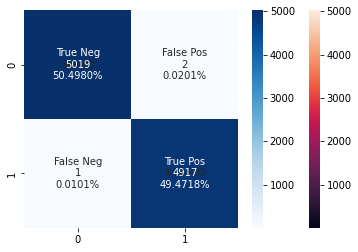

In [ ]:
# Cross Validation Classification Confusion Matrix

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size,
 random_state=seed)
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)

# visualise matrix
sns.heatmap(matrix, annot=True)

group_names = ['True Neg', 'False Pos', 'False Neg' , 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]
group_percentages = ["{0:.4%}".format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt="", cmap='Blues')

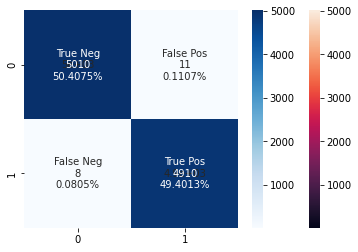

In [ ]:
# Cross Validation Classification Confusion Matrix - SVM

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size,
 random_state=seed)
model = SVC()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)

# visualise matrix
sns.heatmap(matrix, annot=True)

group_names = ['True Neg', 'False Pos', 'False Neg' , 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]
group_percentages = ["{0:.4%}".format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt="", cmap='Blues')

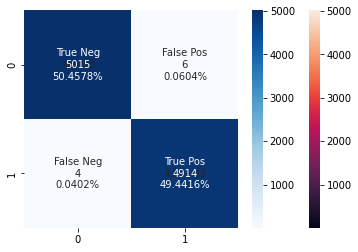

In [ ]:
# Cross Validation Classification Confusion Matrix - KNN

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size,
 random_state=seed)
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)

# visualise matrix
sns.heatmap(matrix, annot=True)

group_names = ['True Neg', 'False Pos', 'False Neg' , 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]
group_percentages = ["{0:.4%}".format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt="", cmap='Blues')